# Análisis de datos Covid-19 Colombia

En este Notebook se analizan los datos de los casos activos de Covid 19 en Colombia utilizando 2 datasets que describen los casos y las cifras a través del tiempo.

## Descripción general de los datasets

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1589311672220_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
spark=SparkSession.builder.appName('bigdata-covid19').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Importar datasets y leer contenidos

In [3]:
casos_col=spark.read.csv('s3://bigdatacovid/Colombia/data.csv',inferSchema=True,header=True)
cifras_col=spark.read.csv('s3://bigdatacovid/Colombia/cifras_col.csv',inferSchema=True,header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Contabilizar regstros y determinar columnas de cada dataset

In [4]:
from pyspark.sql import functions as f
from pyspark.sql.functions import col, max as max_

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
print('El dataframe de casos en Colombia contiene {} registros y  {} columnas : {}'.format(casos_col.count(), len(casos_col.columns), casos_col.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

El dataframe de casos en Colombia contiene 10496 registros y  16 columnas : ['ID de caso', 'Fecha de notificación', 'Codigo DIVIPOLA', 'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS', 'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado', 'fecha reporte web']

In [6]:
print('El dataframe de cifras del Ministerio de Salud de Colombia contiene {} registros y  {} columnas : {}'.format(casos_col.count(), len(cifras_col.columns), cifras_col.columns))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

El dataframe de cifras del Ministerio de Salud de Colombia contiene 10496 registros y  9 columnas : ['FECHA_ACTUALIZACION', 'OBJECTID', 'NUEVOS_CASOS', 'TOTAL_CASOS', 'TOTAL_MUERTES', 'TOTAL_RECUPERADOS', 'GlobalID', 'NUEVOS_MUERTOS', 'NUEVO_RECUPERADOS']

## Infectados por departamento

In [7]:
casos_col.groupBy('Departamento o Distrito ').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+-----+
|Departamento o Distrito |count|
+------------------------+-----+
|             Bogotá D.C.| 4028|
|         Valle del Cauca| 1265|
|                    Meta|  898|
|     Cartagena D.T. y C.|  541|
|               Atlántico|  489|
|               Antioquia|  466|
|                Amazonas|  433|
|       Barranquilla D.E.|  418|
|            Cundinamarca|  278|
|                  Nariño|  262|
|               Risaralda|  216|
|    Santa Marta D.T. ...|  190|
|                   Huila|  147|
|                  Tolima|  103|
|                  Caldas|  100|
|      Norte de Santander|   94|
|               Magdalena|   73|
|                   Cesar|   71|
|                 Quindio|   66|
|                  Boyacá|   61|
+------------------------+-----+
only showing top 20 rows

## Casos importados y procedencia

In [8]:
casos_col.groupBy('Tipo').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
|       Tipo|count|
+-----------+-----+
| En estudio| 6292|
|Relacionado| 3371|
|  Importado|  832|
|       null|    1|
+-----------+-----+

In [9]:
casos_col.groupBy('País de procedencia').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
| País de procedencia|count|
+--------------------+-----+
|            Colombia| 9656|
|              España|  259|
|Estados Unidos de...|  216|
|             Ecuador|   49|
|              México|   46|
|              Brasil|   36|
|              Panamá|   34|
|             Turquía|   28|
|             Jamaica|   16|
|             Francia|   16|
|         Reino Unido|   14|
|         Puerto Rico|   13|
|                Perú|   12|
|              Egipto|   11|
|República Dominicana|   10|
|            Alemania|   10|
|              Italia|    9|
|San Martín (Francia)|    7|
|              Israel|    6|
|               Chile|    4|
+--------------------+-----+
only showing top 20 rows

## Estado actual de infectados 

In [10]:
casos_col.groupBy('atención').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            atención|count|
+--------------------+-----+
|                Casa| 6765|
|          Recuperado| 2569|
|            Hospital|  582|
|           Fallecido|  445|
|        Hospital UCI|  128|
|                 N/A|    6|
|#indicator+infect...|    1|
+--------------------+-----+

In [11]:
casos_col.groupBy('Estado').count().orderBy('count',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|              Estado|count|
+--------------------+-----+
|                Leve| 7819|
|        Asintomático| 1412|
|            Moderado|  634|
|           Fallecido|  444|
|               Grave|  128|
|                leve|   52|
|                null|    6|
|#indicator+infect...|    1|
+--------------------+-----+

## Visualización de datos

In [12]:
sc.install_pypi_package('pandas')
sc.install_pypi_package('matplotlib')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

## Distribución geográfica de los infectados

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

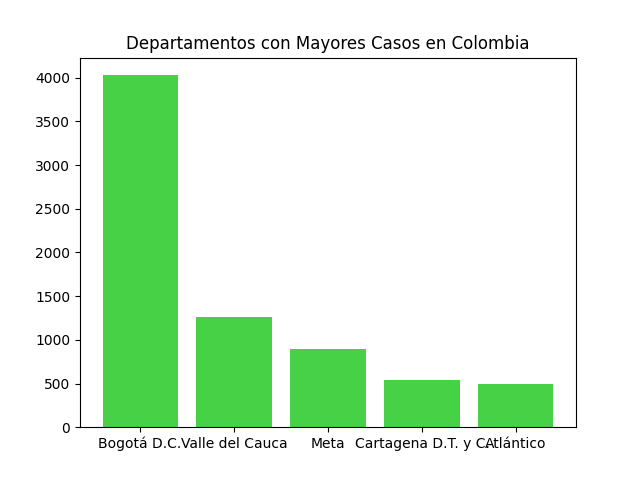

In [13]:
fig, ax = plt.subplots()

data = casos_col.groupBy('Departamento o Distrito ').count().orderBy('count',ascending=False)
x = data.toPandas()['Departamento o Distrito '].values.tolist()
y = data.toPandas()['count'].values.tolist()

ax.bar(x[0:5],y[0:5], color='#47d147')
ax.set_title('Departamentos con Mayores Casos en Colombia')

%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

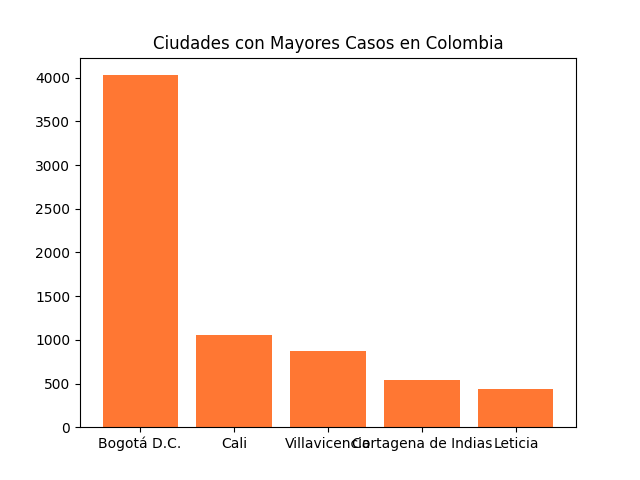

In [14]:
fig, ax = plt.subplots()

data = casos_col.groupBy('Ciudad de ubicación').count().orderBy('count',ascending=False)
x = data.toPandas()['Ciudad de ubicación'].values.tolist()
y = data.toPandas()['count'].values.tolist()

ax.bar(x[0:5],y[0:5], color='#ff7733')
ax.set_title('Ciudades con Mayores Casos en Colombia')

%matplot plt

## Casos por sexo

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

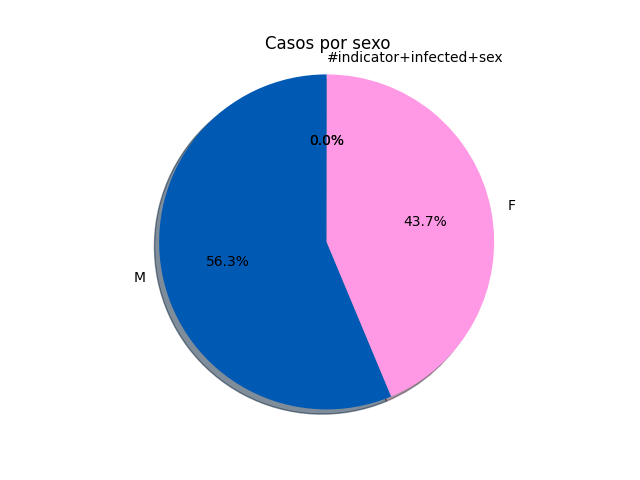

In [15]:
plt.clf()

data = casos_col.groupBy('Sexo').count().orderBy('count',ascending=False)
labels = data.toPandas()['Sexo'].values.tolist()
sizes = data.toPandas()['count'].values.tolist()

colors = ['#0059b3', '#ff99e6']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title("Casos por sexo")

%matplot plt

## Estado de los infectados

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

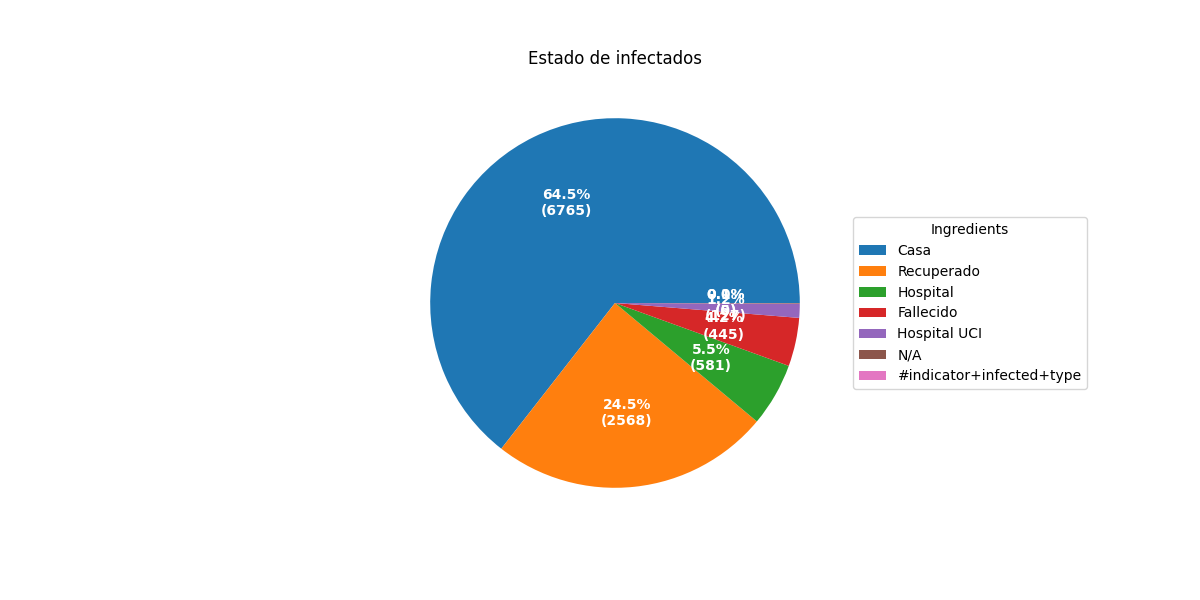

In [16]:
plt.clf()

data = casos_col.groupBy('atención').count().orderBy('count',ascending=False)
labels = data.toPandas()['atención'].values.tolist()
sizes = data.toPandas()['count'].values.tolist()

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,title="Ingredients",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Estado de infectados")

%matplot plt



## Curva de contagios, muertes y recuperados diarios

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

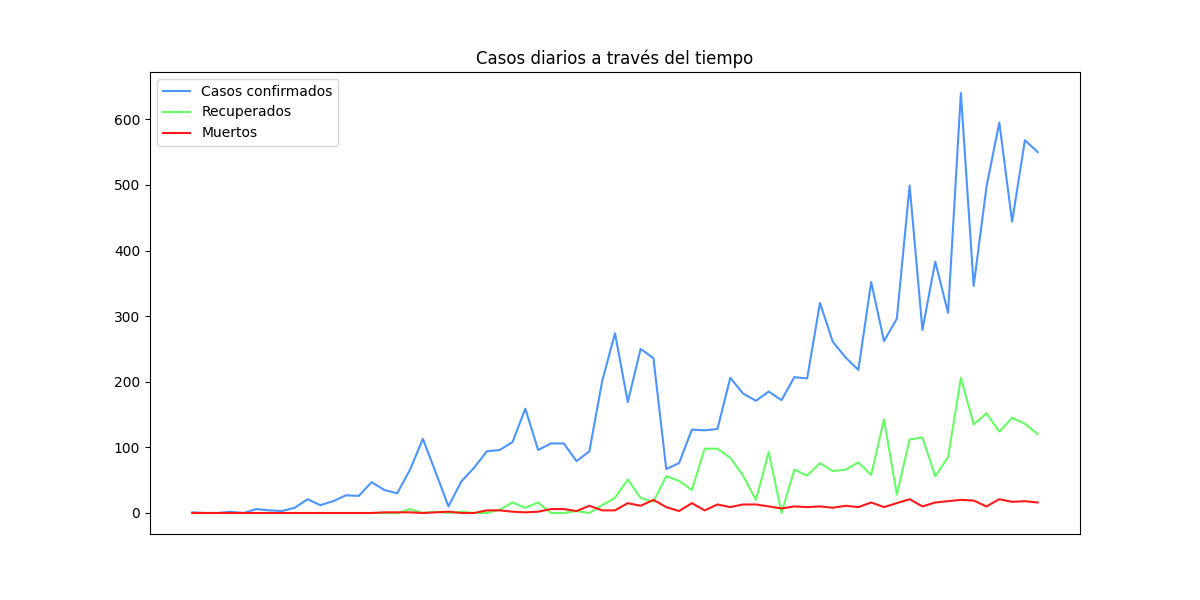

In [17]:
plt.clf()

#fechas = cifras_col.select("FECHA_ACTUALIZACION").rdd.flatMap(lambda x: x).collect()
casos = cifras_col.select("NUEVOS_CASOS").rdd.flatMap(lambda x: x).collect() 
recuperados = cifras_col.select("NUEVO_RECUPERADOS").rdd.flatMap(lambda x: x).collect()
muertos = cifras_col.select("NUEVOS_MUERTOS").rdd.flatMap(lambda x: x).collect()
# multiple line plot
plt.plot( casos, label = "Casos confirmados", color = '#4d94ff')
plt.plot( recuperados, label = "Recuperados", color = '#66ff66')
plt.plot( muertos, label = "Muertos", color = '#ff1a1a')
plt.title("Casos diarios a través del tiempo")
plt.xticks([])
plt.legend()
%matplot plt

## Casos confirmados, muertes y recuperados totales

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

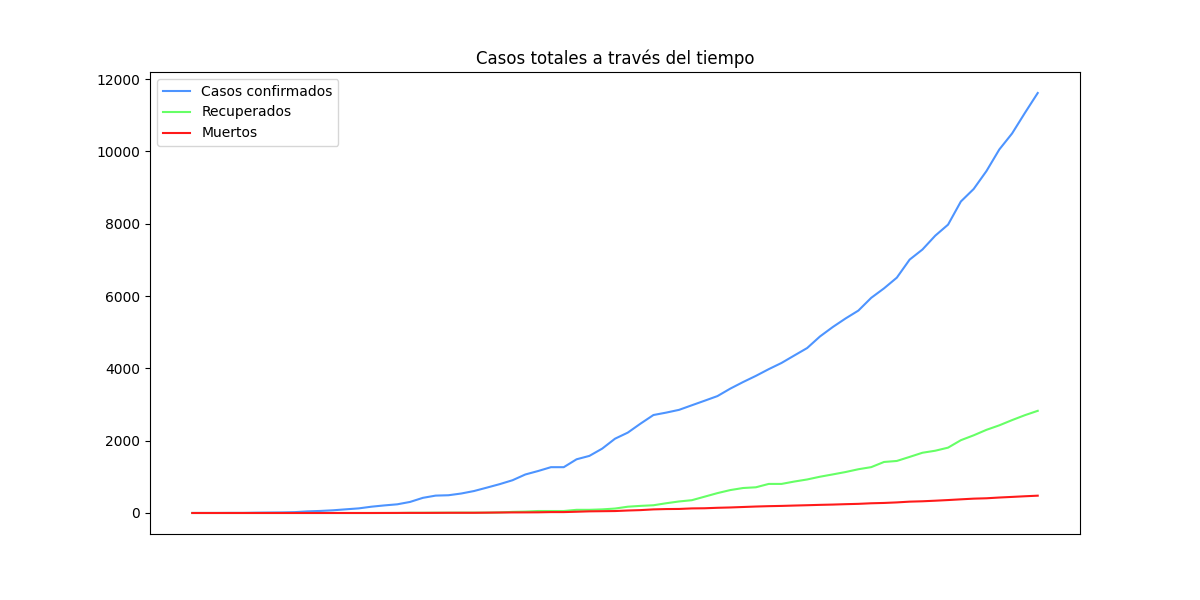

In [18]:
plt.clf()

casos = cifras_col.select("TOTAL_CASOS").rdd.flatMap(lambda x: x).collect() 
recuperados = cifras_col.select("TOTAL_RECUPERADOS").rdd.flatMap(lambda x: x).collect()
muertos = cifras_col.select("TOTAL_MUERTES").rdd.flatMap(lambda x: x).collect()
# multiple line plot
plt.plot( casos, label = "Casos confirmados", color = '#4d94ff')
plt.plot( recuperados, label = "Recuperados", color = '#66ff66')
plt.plot( muertos, label = "Muertos", color = '#ff1a1a')
plt.xticks([])
plt.title("Casos totales a través del tiempo")
plt.legend()
%matplot plt